Confusion Matrix:
[[84 87]
 [60 69]]

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.49      0.53       171
           1       0.44      0.53      0.48       129

    accuracy                           0.51       300
   macro avg       0.51      0.51      0.51       300
weighted avg       0.52      0.51      0.51       300



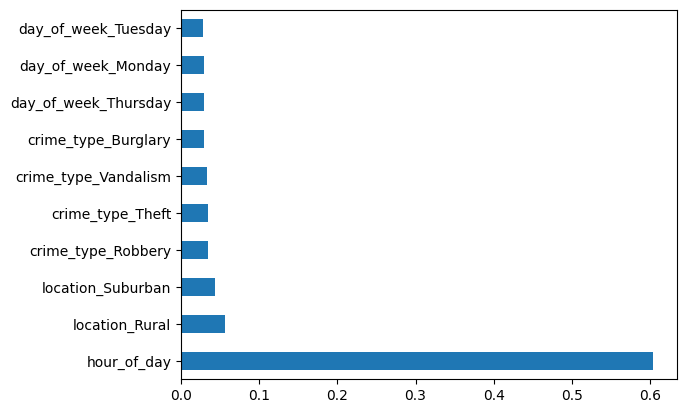

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Generate synthetic dataset
np.random.seed(42)
data = pd.DataFrame({
    'day_of_week': np.random.choice(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 1000),
    'hour_of_day': np.random.randint(0, 24, 1000),
    'crime_type': np.random.choice(['Theft', 'Assault', 'Burglary', 'Robbery', 'Vandalism'], 1000),
    'location': np.random.choice(['Downtown', 'Suburban', 'Rural'], 1000),
    'is_crime': np.random.randint(0, 2, 1000) # y or traget
})

# Convert categorical variables to numeric
data = pd.get_dummies(data, columns=['day_of_week', 'crime_type', 'location'], drop_first=True)

# Split the data into training and testing sets
X = data.drop('is_crime', axis=1)
y = data['is_crime']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Generate synthetic dataset
np.random.seed(42)
normal_data = np.random.normal(loc=0, scale=1, size=(950, 2))
anomalous_data = np.random.uniform(low=-4, high=4, size=(50, 2))
data = np.vstack([normal_data, anomalous_data])
labels = np.hstack([np.zeros(950), np.ones(50)])  # 0 for normal, 1 for anomaly

df = pd.DataFrame(data, columns=['feature1', 'feature2'])
df['label'] = labels


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

# Split data into features and labels
X = df[['feature1', 'feature2']]
y = df['label']

# Train Isolation Forest
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(X)

# Predict anomalies
df['predicted_label'] = model.predict(X)
df['predicted_label'] = df['predicted_label'].map({1: 0, -1: 1})  # Map 1 to normal, -1 to anomaly

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y, df['predicted_label']))
print("\nClassification Report:")
print(classification_report(y, df['predicted_label']))


Confusion Matrix:
[[931  19]
 [ 19  31]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       950
         1.0       0.62      0.62      0.62        50

    accuracy                           0.96      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.96      0.96      0.96      1000



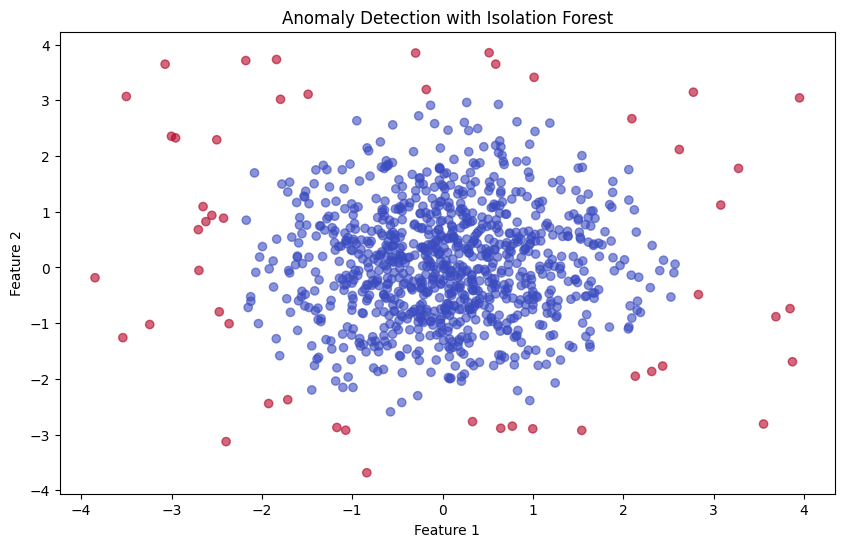

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['feature1'], df['feature2'], c=df['predicted_label'], cmap='coolwarm', alpha=0.6)
plt.title('Anomaly Detection with Isolation Forest')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [ ]:
pip install numpy pillow


In [ ]:
import numpy as np
from PIL import Image
import os

# Parameters
num_images_per_class = 100
image_size = (224, 224)
classes = ['Theft', 'Assault', 'Burglary', 'Robbery', 'Vandalism']
base_dir = 'synthetic_images'

# Create directories
for class_name in classes:
    os.makedirs(os.path.join(base_dir, class_name), exist_ok=True)

# Generate and save images
for class_name in classes:
    for i in range(num_images_per_class):
        # Create a random image
        image_array = np.random.randint(0, 256, size=(image_size[0], image_size[1], 3), dtype=np.uint8)
        image = Image.fromarray(image_array)

        # Save the image
        image_path = os.path.join(base_dir, class_name, f'{class_name}_{i}.png')
        image.save(image_path)

print("Synthetic images created successfully!")


Synthetic images created successfully!


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input

# Load and preprocess images
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    'synthetic_images',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'synthetic_images',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 400 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [ ]:
pip install geopandas

In [ ]:
import pandas as pd
import numpy as np

# Generate synthetic dataset
np.random.seed(42)
data = pd.DataFrame({
    'latitude': np.random.uniform(low=12.85, high=13.15, size=500),
    'longitude': np.random.uniform(low=79.85, high=80.15, size=500),
    'crime_type': np.random.choice(['Theft', 'Assault', 'Burglary', 'Robbery', 'Vandalism'], 500)
})


In [ ]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Load the shapefile
world = gpd.read_file('/content/ne_110m_admin_0_countries.shp')

# Generate synthetic dataset
import pandas as pd
import numpy as np

np.random.seed(42)
data = pd.DataFrame({
    'latitude': np.random.uniform(low=12.85, high=13.15, size=500),
    'longitude': np.random.uniform(low=79.85, high=80.15, size=500),
    'crime_type': np.random.choice(['Theft', 'Assault', 'Burglary', 'Robbery', 'Vandalism'], 500)
})

# Convert data to GeoDataFrame
geometry = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]
gdf = gpd.GeoDataFrame(data, geometry=geometry)

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
world.boundary.plot(ax=ax)
gdf.plot(ax=ax, marker='o', color='red', markersize=5, alpha=0.5)
plt.title('Synthetic Crime Data Visualization')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


DataSourceError: /content/ne_110m_admin_0_countries.shp: No such file or directory

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten

# Load and preprocess images
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    'path/to/your/images/directory',
  target_size=(224, 224),
  batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'path/to/your/images/directory',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


FileNotFoundError: [Errno 2] No such file or directory: 'path/to/your/images/directory'

In [ ]:
import folium
from folium.plugins import HeatMap

# Create a base map
m = folium.Map(location=[13.0, 80.0], zoom_start=12)

# Add heatmap layer
heat_data = [[row['latitude'], row['longitude']] for index, row in data.iterrows()]
HeatMap(heat_data).add_to(m)

# Save the map
m.save('crime_heatmap.html')

# Display the map
m
